### Import DEpendenies or library

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv('/content/metadata.csv')
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


Data Preprocessing

In [122]:
df.shape

(7565, 10)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [124]:
df.describe()

,ambient_temperature,test_id,uid
count,7565.000000,7565.000000,7565.000000
mean,20.017713,176.012558,3783.000000
std,11.082914,152.174147,2183.971726
min,4.000000,0.000000,1.000000
25%,4.000000,55.000000,1892.000000
50%,24.000000,129.000000,3783.000000
75%,24.000000,255.000000,5674.000000
max,44.000000,615.000000,7565.000000


In [125]:
df = df.drop(['start_time', 'battery_id', 'test_id', 'uid', 'filename'], axis = 1)

In [126]:
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN


In [127]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,4771
Re,5609
Rct,5609


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   Capacity             2794 non-null   object
 3   Re                   1956 non-null   object
 4   Rct                  1956 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.6+ KB


In [129]:
df['Capacity'] = pd.to_numeric(df['Capacity'], errors = 'coerce')

In [130]:
df['Rct'] = pd.to_numeric(df['Rct'], errors = 'coerce')
df['Re'] = pd.to_numeric(df['Re'], errors = 'coerce')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   ambient_temperature  7565 non-null   int64  
 2   Capacity             2769 non-null   float64
 3   Re                   1947 non-null   float64
 4   Rct                  1947 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 295.6+ KB


In [132]:
df['Re'] = df['Re'].fillna(df['Re'].mean())
df['Rct'] = df['Rct'].fillna(df['Rct'].mean())
df['Capacity'] = df['Capacity'].fillna(df['Capacity'].mean())

In [133]:
encoder = LabelEncoder()

In [134]:
df['type'] = encoder.fit_transform(df['type'])

In [135]:
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12
3,2,24,1.326543,5.319186e-02,1.647340e-01
4,1,4,1.524366,-4.976500e+11,1.055903e+12


TRAIN TEST SPLIT

In [136]:
X = df.drop('ambient_temperature', axis = 1)
y = df['ambient_temperature']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [138]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL BUILDING

In [139]:
model = Sequential()

model.add(Dense(units = 64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(units = 32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units =1, activation = 'linear'))

In [140]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [141]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,489 (13.63 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history = model.fit(X_train , y_train , epochs = 200, batch_size = 32 , validation_data = (X_test , y_test))

Epoch 1/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 383.8862 - val_loss: 109272.8281
Epoch 2/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 127.9991 - val_loss: 84731.0156
Epoch 3/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 116.9639 - val_loss: 67778.1406
Epoch 4/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 116.6087 - val_loss: 54355.0977
Epoch 5/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 112.7418 - val_loss: 32095.0801
Epoch 6/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106.9481 - val_loss: 26564.2188
Epoch 7/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 109.9540 - val_loss: 19973.5723
Epoch 8/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.1262 - val_loss: 16165.0420
Epoch 9/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103.1747 - val_loss: 9148.7773
Epoch 10/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103.7967 - val_loss: 8238.1504
Epoch 11/200
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103.7165

Model Evolution

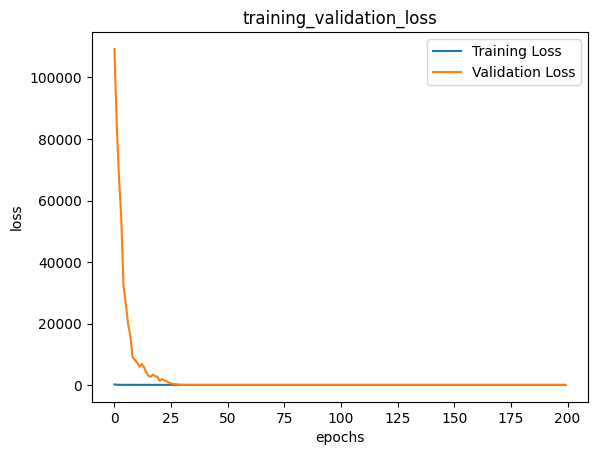

In [145]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training_validation_loss')
plt.show()

In [146]:
model.evaluate(X_test, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.8329


83.54247283935547

SAVE MODEL

In [147]:
import joblib

# Save model
model.save('battery_temp_model.h5')

# Save scaler and encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("All saved successfully!")


All saved successfully!
